## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

TensorFlow 2.x selected.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/drive/My Drive/Great_Lakes_Lab/CNN_8_res/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
import os
os.chdir('/content/drive/My Drive/Great_Lakes_Lab/CNN_8_res')

In [0]:
import zipfile
with zipfile.ZipFile("train.zip","r") as zip_ref:
    zip_ref.extractall()

In [0]:
#from zipfile import ZipFile
#with ZipFile(project_path+'train.zip', 'r') as z:
  #z.extractall()

Repeat the same step for test.zip

In [0]:
from zipfile import ZipFile
with ZipFile('test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile('sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile('labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
labels = pd.read_csv('/content/drive/My Drive/Great_Lakes_Lab/CNN_8_res/labels.csv')

In [8]:
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


### Print the count of each category of Dogs given in the dataset



In [0]:
breed_count=labels['breed'].value_counts()
breed_count

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64

In [0]:
breed_count.shape

(120,)

### Get one-hot encodings of labels

In [58]:
targets=pd.Series(labels['breed'])
one_hot=pd.get_dummies(targets,sparse=True)
one_hot_labels=np.asarray(one_hot)
one_hot_labels[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [59]:
label_encoder=LabelEncoder()
integer_encoded=label_encoder.fit_transform(labels['breed'])
Y = tf.keras.utils.to_categorical(integer_encoded, num_classes=None,dtype= int)
Y[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
img_rows=128
img_cols=128
img_size=128
num_channel=3

In [46]:
from tqdm import tqdm
import cv2
x_train = []
y_train = []
i = 0 # initialisation
for f, img in tqdm(labels.values): # f for format ,jpg
    train_img = cv2.imread('./train/{}.jpg'.format(f), 1)
    train_img_resize = cv2.resize(train_img, (img_rows, img_cols)) 
    x_train.append(train_img_resize)
    y_train.append(img)

100%|██████████| 10222/10222 [01:19<00:00, 129.31it/s]


In [0]:
print(type(y_train))
print(type(x_train))

<class 'list'>
<class 'list'>


In [60]:
y_train[1]

'dingo'

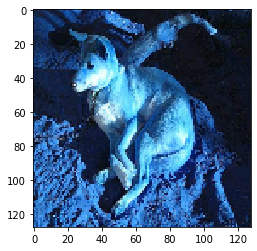

In [61]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [0]:
x_train_scaled=np.subtract(x_train,np.min(x_train))/np.subtract(np.max(x_train),np.min(x_train))

In [0]:
np.max(x_train_scaled)

In [0]:
type(x_train_scaled)

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
X_train, X_validation, Y_train, Y_validation = train_test_split(x_train_scaled,y_train, test_size=0.2, random_state=42)

In [0]:
Y_train[0]

'welsh_springer_spaniel'

In [0]:
print(type(Y_train))
print(type(X_train))

<class 'list'>
<class 'numpy.ndarray'>


In [62]:
label_encoder=LabelEncoder()
integer_encoded_train=label_encoder.fit_transform(Y_train)
Y_train = tf.keras.utils.to_categorical(integer_encoded_train, num_classes=None,dtype= int)
Y_train[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [63]:
integer_encoded_validation=label_encoder.transform(Y_validation)
Y_validation = tf.keras.utils.to_categorical(integer_encoded_validation, num_classes=None,dtype= int)
Y_validation[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [0]:
type(Y_train)

numpy.ndarray

In [0]:
X_train=np.array(X_train)
X_validation=np.array(X_validation)
Y_train=np.array(Y_train)
Y_validation=np.array(Y_validation)

### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
sample_submission = pd.read_csv('/content/drive/My Drive/Great_Lakes_Lab/CNN_8_res/sample_submission.csv')

In [0]:
test_img=sample_submission.id

In [0]:
y_test = sample_submission.drop('id', axis = 1)

Run the below code to load the test image files in x_test_feature

In [69]:
from tqdm import tqdm
import cv2
x_test = []
i = 0 # initialisation
for f in tqdm(sample_submission.id): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 1)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test.append(img_resize)
    

100%|██████████| 10357/10357 [01:16<00:00, 134.98it/s]


Normalize the test data and convert it into 4 dimensions

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
#Clear any previous model from memory
tf.keras.backend.clear_session()

#Initialize model
model = tf.keras.models.Sequential()

#Reshape data from 2D (28,28) to 3D (28, 28, 1)
#model.add(tf.keras.layers.Reshape((128,128,3),input_shape=(64,128,3)))

#normalize data
#model.add(tf.keras.layers.BatchNormalization(input_shape=(img_size,img_size,3,)))

model.add(tf.keras.layers.BatchNormalization(input_shape=(img_size,img_size,3)))
#Add Conv Layer
model.add(tf.keras.layers.Conv2D(128, kernel_size=(5,5), activation='relu'))

#normalize data
model.add(tf.keras.layers.BatchNormalization(input_shape=(img_size,img_size,3,)))

#Add Conv Layer
model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu'))

#normalize data
model.add(tf.keras.layers.BatchNormalization(input_shape=(img_size,img_size,3,)))

#Add Max Pool layer
#model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Add Dense Layers after flattening the data
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))

#Add Dropout
#model.add(tf.keras.layers.Dropout(0.25))

#Add Output Layer
model.add(tf.keras.layers.Dense(120, activation='softmax'))

In [0]:
#Specify Loass and Optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
#Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 64, 64, 3)         12        
_________________________________________________________________
conv2d (Conv2D)              (None, 60, 60, 128)       9728      
_________________________________________________________________
batch_normalization_1 (Batch (None, 60, 60, 128)       512       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 58, 58, 256)       295168    
_________________________________________________________________
batch_normalization_2 (Batch (None, 58, 58, 256)       1024      
_________________________________________________________________
flatten (Flatten)            (None, 861184)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               2

### Use batch_size = 128 and epochs = 10 and execute the model

In [0]:
#Train the model
model.fit(X_train,Y_train,          
          validation_data=(X_validation,Y_validation),
          epochs=10,steps_per_epoch=len(X_train)//128,
          batch_size=128)

Train on 8177 samples, validate on 2045 samples
Epoch 1/10
8049/8177 [============================>.] - ETA: 0s - loss: 3.3588 - accuracy: 0.3095 - val_loss: 13.6351 - val_accuracy: 0.0225

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,
                                                               width_shift_range=0.2,
                                                               height_shift_range=0.2,
                                                               rotation_range=30,
                                                               shear_range=0.2,
                                                               zoom_range=0.3)
#transformed_array = transform_fn.random_transform(flower_array)
#transformed_image = tf.keras.preprocessing.image.array_to_img(transformed_array)

In [0]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,                                                               
                                                               shear_range=0.2,
                                                               zoom_range=0.3)

In [0]:
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,                                                               
                                                               shear_range=0.2,
                                                               zoom_range=0.3)

In [0]:
train_datagen.fit(X_train)
validation_datagen.fit(X_validation)

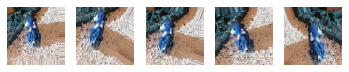

In [0]:
from matplotlib import pyplot as plt
gen = datagen.flow(X_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
train_generator = train_datagen.flow(X_train, Y_train, batch_size=128)
validation_generator = validation_datagen.flow(X_validation, Y_validation)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [0]:
model.fit_generator(train_generator,validation_data=validation_generator,
                    steps_per_epoch=len(X_train) // 128, epochs=10)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 63 steps, validate for 64 steps
Epoch 1/10
63/63 [==============================] - 13s 204ms/step - loss: 7.5053 - accuracy: 0.0171 - val_loss: 9.8559 - val_accuracy: 0.0147
Epoch 2/10
63/63 [==============================] - 12s 194ms/step - loss: 4.8142 - accuracy: 0.0103 - val_loss: 4.8275 - val_accuracy: 0.0142
Epoch 3/10
63/63 [==============================] - 13s 199ms/step - loss: 4.7878 - accuracy: 0.0109 - val_loss: 4.8104 - val_accuracy: 0.0142
Epoch 4/10
63/63 [==============================] - 12s 197ms/step - loss: 4.7831 - accuracy: 0.0111 - val_loss: 4.7871 - val_accuracy: 0.0142
Epoch 5/10
63/63 [==============================] - 12s 196ms/step - loss: 4.7823 - accuracy: 0.0107 - val_loss: 4.7861 - val_accuracy: 0.0142
Epoch 6/10
63/63 [==============================] - 12s 195ms/step - loss: 4.7826 - accuracy: 0.0107 - val_loss: 4.78

In [0]:
# evaluate model
_, acc = model.evaluate_generator(validation_generator, steps=len(validation_iterator), verbose=0)
print('Test Accuracy: %.3f' % (acc * 100))

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=(project_path + 'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg',input_shape=(64,64,3))

Print the summary of the base_model

In [0]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
#Initialize model
new_model = tf.keras.models.Sequential()
new_model.add(base_model)


In [0]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
Total params: 14,714,688
Trainable params: 0
Non-trainable params: 14,714,688
_________________________________________________________________


In [0]:
new_model.add(tf.keras.layers.Flatten())
new_model.add(tf.keras.layers.Dense(1024, activation='relu'))
new_model.add(tf.keras.layers.Dropout(0.5))
new_model.add(tf.keras.layers.BatchNormalization())
new_model.add(tf.keras.layers.Dense(256, activation='relu'))
new_model.add(tf.keras.layers.Dropout(0.5))
new_model.add(tf.keras.layers.BatchNormalization())
new_model.add(tf.keras.layers.Dense(120, activation='softmax'))

### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
for layer in new_model.layers[:1]:
    layer.trainable = False

In [0]:
for layer in new_model.layers:
    print(layer,layer.trainable)

<tensorflow.python.keras.engine.training.Model object at 0x7fb76a22ff60> False
<tensorflow.python.keras.layers.core.Flatten object at 0x7fb76a161f98> True
<tensorflow.python.keras.layers.core.Dense object at 0x7fb76a161fd0> True
<tensorflow.python.keras.layers.core.Dropout object at 0x7fb76a16b390> True
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fb76a16b358> True
<tensorflow.python.keras.layers.core.Dense object at 0x7fb76a16b3c8> True
<tensorflow.python.keras.layers.core.Dropout object at 0x7fb76a0f6f28> True
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fb76a118e48> True
<tensorflow.python.keras.layers.core.Dense object at 0x7fb76a118ef0> True


In [0]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_6 (Dense)              (None, 256)               262400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)              

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

In [0]:
#Specify Loass and Optimizer
new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [0]:
#Train the model
new_model.fit(X_train,Y_train,          
          validation_data=(X_validation,Y_validation),
          epochs=20,steps_per_epoch =len(X_train)//128,
          batch_size=128)

Train on 8177 samples, validate on 2045 samples
Epoch 1/20
8049/8177 [============================>.] - ETA: 0s - loss: 3.5801 - accuracy: 0.1700 - val_loss: 4.0636 - val_accuracy: 0.1110

Try to get training and validation accuracy to be more than 90%

In [0]:
img_size=128
img_depth = 3

In [0]:
tf.keras.backend.clear_session()
base_model_1 = tf.keras.applications.ResNet50(include_top=False, #Do not include classification layer for imagenet
                                       input_shape=(img_size,img_size, img_depth),pooling='avg',
                                       weights='imagenet')

In [51]:
base_model_1.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [0]:
#Initialize model
new_model_1 = tf.keras.models.Sequential()
new_model_1.add(base_model_1)
new_model_1.add(tf.keras.layers.Flatten())
new_model_1.add(tf.keras.layers.Dense(1024, activation='relu'))
new_model_1.add(tf.keras.layers.Dropout(0.5))
new_model_1.add(tf.keras.layers.BatchNormalization())
new_model_1.add(tf.keras.layers.Dropout(0.5))
new_model_1.add(tf.keras.layers.BatchNormalization())
new_model_1.add(tf.keras.layers.Dense(120, activation='softmax'))

In [0]:
for layer in new_model_1.layers[:1]:
    layer.trainable = False

In [54]:
for layer in new_model_1.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.training.Model object at 0x7fa69aafbf98> False
<tensorflow.python.keras.layers.core.Flatten object at 0x7fa69aad77b8> True
<tensorflow.python.keras.layers.core.Dense object at 0x7fa69aad7a90> True
<tensorflow.python.keras.layers.core.Dropout object at 0x7fa69aad7b70> True
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fa69a44cc18> True
<tensorflow.python.keras.layers.core.Dropout object at 0x7fa69a44c780> True
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fa69a3e57f0> True
<tensorflow.python.keras.layers.core.Dense object at 0x7fa69a3e5550> True


In [55]:
new_model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4

In [0]:
#Specify Loass and Optimizer
new_model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [65]:
#Train the model
new_model_1.fit(X_train,Y_train,          
          validation_data=(X_validation,Y_validation),
          epochs=20,steps_per_epoch=len(X_train)//128,
          batch_size=128)

Train on 8177 samples, validate on 2045 samples
Epoch 1/20
8049/8177 [============================>.] - ETA: 0s - loss: 0.7344 - accuracy: 0.7972 - val_loss: 148.4098 - val_accuracy: 0.0059

In [0]:
x_test=np.array(x_test)

In [72]:
type(x_test)

numpy.ndarray

In [73]:
test_predict=new_model_1.predict(x_test)
test_predict[0]

array([5.0786275e-07, 3.1515028e-02, 7.2396979e-08, 3.4673700e-08,
       4.8058201e-08, 5.6858185e-09, 1.0271576e-09, 5.9911287e-10,
       9.1992376e-08, 1.8360484e-07, 4.4816380e-07, 5.0708188e-08,
       1.0487144e-08, 5.6969193e-03, 7.8080922e-07, 1.4170579e-08,
       5.3840854e-06, 2.3370544e-07, 7.3312163e-02, 4.4141412e-08,
       6.7818441e-08, 8.7199346e-08, 8.5361735e-09, 5.0908173e-03,
       4.7474846e-06, 5.8603999e-03, 1.3051481e-07, 4.1995850e-08,
       9.1933998e-09, 5.0146491e-06, 2.8794541e-04, 1.3470282e-04,
       5.3488702e-04, 1.4500867e-01, 4.8437914e-07, 6.5772642e-06,
       2.2029058e-08, 1.3277844e-08, 3.8431137e-11, 2.7782204e-07,
       3.0599858e-05, 1.7589449e-04, 2.4067099e-09, 3.8768208e-06,
       1.3073243e-05, 2.8625414e-06, 7.5983330e-08, 2.1958957e-08,
       4.5070701e-06, 3.9794427e-04, 1.2534458e-08, 5.7833108e-07,
       2.2289478e-03, 1.5134676e-08, 8.1924991e-09, 1.7601134e-07,
       1.7063149e-07, 3.3094108e-10, 2.6029034e-06, 2.3312557e

In [74]:
a=np.argmax(test_predict,axis=1)
a

array([85, 94, 82, ..., 37, 70, 66])